In [1]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
from sklearn import tree
import seaborn as sns
plt.rcParams['figure.figsize'] = (10,5)
plt.rcParams['figure.dpi'] = 1000
sns.set_theme(style='darkgrid', palette='rainbow')
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('Fraud_check.csv')
df

Undergrad Marital.Status  Taxable.Income  City.Population  \
0          NO         Single           68833            50047   
1         YES       Divorced           33700           134075   
2          NO        Married           36925           160205   
3         YES         Single           50190           193264   
4          NO        Married           81002            27533   
..        ...            ...             ...              ...   
595       YES       Divorced           76340            39492   
596       YES       Divorced           69967            55369   
597        NO       Divorced           47334           154058   
598       YES        Married           98592           180083   
599        NO       Divorced           96519           158137   

     Work.Experience Urban  
0                 10   YES  
1                 18   YES  
2                 30   YES  
3                 15   YES  
4                 28    NO  
..               ...   ...  
595                7   YES  
596                2   YES  
597                0   YES  
598               17    NO  
599               16    NO  

[600 rows x 6 columns]

In [3]:
df.duplicated().sum()

0

In [4]:
df.isna().sum()

Undergrad          0
Marital.Status     0
Taxable.Income     0
City.Population    0
Work.Experience    0
Urban              0
dtype: int64

In [5]:
sns.pairplot(df)

In [6]:
df.loc[df['Taxable.Income']<=30000, 'Taxable.Income'] = 1

In [7]:
df.loc[df['Taxable.Income']>30000, 'Taxable.Income'] = 0

In [8]:
#Here we assigned risky as 1 and good as 0

In [9]:
df

Undergrad Marital.Status  Taxable.Income  City.Population  \
0          NO         Single               0            50047   
1         YES       Divorced               0           134075   
2          NO        Married               0           160205   
3         YES         Single               0           193264   
4          NO        Married               0            27533   
..        ...            ...             ...              ...   
595       YES       Divorced               0            39492   
596       YES       Divorced               0            55369   
597        NO       Divorced               0           154058   
598       YES        Married               0           180083   
599        NO       Divorced               0           158137   

     Work.Experience Urban  
0                 10   YES  
1                 18   YES  
2                 30   YES  
3                 15   YES  
4                 28    NO  
..               ...   ...  
595                7   YES  
596                2   YES  
597                0   YES  
598               17    NO  
599               16    NO  

[600 rows x 6 columns]

In [10]:
df.replace(['NO','YES'],[0,1], inplace=True)
df

Undergrad Marital.Status  Taxable.Income  City.Population  \
0            0         Single               0            50047   
1            1       Divorced               0           134075   
2            0        Married               0           160205   
3            1         Single               0           193264   
4            0        Married               0            27533   
..         ...            ...             ...              ...   
595          1       Divorced               0            39492   
596          1       Divorced               0            55369   
597          0       Divorced               0           154058   
598          1        Married               0           180083   
599          0       Divorced               0           158137   

     Work.Experience  Urban  
0                 10      1  
1                 18      1  
2                 30      1  
3                 15      1  
4                 28      0  
..               ...    ...  
595                7      1  
596                2      1  
597                0      1  
598               17      0  
599               16      0  

[600 rows x 6 columns]

In [11]:
df['Marital.Status'].replace(['Single','Married','Divorced'],[0,1,2], inplace=True)
df

Undergrad  Marital.Status  Taxable.Income  City.Population  \
0            0               0               0            50047   
1            1               2               0           134075   
2            0               1               0           160205   
3            1               0               0           193264   
4            0               1               0            27533   
..         ...             ...             ...              ...   
595          1               2               0            39492   
596          1               2               0            55369   
597          0               2               0           154058   
598          1               1               0           180083   
599          0               2               0           158137   

     Work.Experience  Urban  
0                 10      1  
1                 18      1  
2                 30      1  
3                 15      1  
4                 28      0  
..               ...    ...  
595                7      1  
596                2      1  
597                0      1  
598               17      0  
599               16      0  

[600 rows x 6 columns]

In [12]:
x = df.drop(columns=['Taxable.Income'])
y = df['Taxable.Income']

In [13]:
x

Undergrad  Marital.Status  City.Population  Work.Experience  Urban
0            0               0            50047               10      1
1            1               2           134075               18      1
2            0               1           160205               30      1
3            1               0           193264               15      1
4            0               1            27533               28      0
..         ...             ...              ...              ...    ...
595          1               2            39492                7      1
596          1               2            55369                2      1
597          0               2           154058                0      1
598          1               1           180083               17      0
599          0               2           158137               16      0

[600 rows x 5 columns]

In [14]:
y

0      0
1      0
2      0
3      0
4      0
      ..
595    0
596    0
597    0
598    0
599    0
Name: Taxable.Income, Length: 600, dtype: int64

In [15]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2, random_state=42)

In [16]:
xtrain

Undergrad  Marital.Status  City.Population  Work.Experience  Urban
145          0               2           197422                2      1
9            1               2           155482                4      1
375          0               1           130935                2      0
523          0               2            42198               12      0
188          0               2           137569               10      0
..         ...             ...              ...              ...    ...
71           0               0           105680               22      0
106          1               0            58535               20      1
270          0               1           130680                5      0
435          0               2           111774                4      1
102          1               2            91488               23      0

[480 rows x 5 columns]

In [17]:
ytrain

145    0
9      0
375    0
523    0
188    1
      ..
71     0
106    1
270    0
435    0
102    0
Name: Taxable.Income, Length: 480, dtype: int64

In [18]:
rf = RandomForestClassifier()

In [19]:
rf.fit(xtrain,ytrain)

RandomForestClassifier()

In [20]:
ypred = rf.predict(xtest)

In [21]:
ypred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [22]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.78      0.98      0.87        94
           1       0.00      0.00      0.00        26

    accuracy                           0.77       120
   macro avg       0.39      0.49      0.43       120
weighted avg       0.61      0.77      0.68       120



In [23]:
rf.score(xtrain,ytrain), rf.score(xtest,ytest)

(1.0, 0.7666666666666667)

In [24]:
from sklearn.model_selection import GridSearchCV

In [25]:
params = {
    'criterion' : ['entropy', 'gini'],
    'max_depth' : [2,4,6,8,10],
}

In [26]:
grid = GridSearchCV(estimator=RandomForestClassifier(), param_grid=params, verbose=1)

In [27]:
grid.fit(xtrain,ytrain)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': [2, 4, 6, 8, 10]},
             verbose=1)

In [28]:
grid.best_params_

{'criterion': 'entropy', 'max_depth': 2}

In [29]:
rfc = RandomForestClassifier(criterion='entropy', max_depth=2)

In [30]:
rfc.fit(xtrain,ytrain)

RandomForestClassifier(criterion='entropy', max_depth=2)

In [31]:
ypred = rfc.predict(xtest)
ypred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [32]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.78      1.00      0.88        94
           1       0.00      0.00      0.00        26

    accuracy                           0.78       120
   macro avg       0.39      0.50      0.44       120
weighted avg       0.61      0.78      0.69       120



In [33]:
rfc.score(xtrain,ytrain), rfc.score(xtest,ytest)

(0.7958333333333333, 0.7833333333333333)

In [34]:
rfc.estimators_[0]

DecisionTreeClassifier(criterion='entropy', max_depth=2, max_features='sqrt',
                       random_state=596280853)

In [35]:
list(x.columns)

['Undergrad', 'Marital.Status', 'City.Population', 'Work.Experience', 'Urban']

[Text(0.5, 0.8333333333333334, 'Work.Experience <= 28.5\nentropy = 0.73\nsamples = 311\nvalue = [382, 98]'),
 Text(0.25, 0.5, 'Work.Experience <= 3.5\nentropy = 0.709\nsamples = 290\nvalue = [362, 87]'),
 Text(0.375, 0.6666666666666667, 'True  '),
 Text(0.125, 0.16666666666666666, 'entropy = 0.859\nsamples = 30\nvalue = [33.0, 13.0]'),
 Text(0.375, 0.16666666666666666, 'entropy = 0.688\nsamples = 260\nvalue = [329, 74]'),
 Text(0.75, 0.5, 'Urban <= 0.5\nentropy = 0.938\nsamples = 21\nvalue = [20, 11]'),
 Text(0.625, 0.6666666666666667, '  False'),
 Text(0.625, 0.16666666666666666, 'entropy = 0.787\nsamples = 12\nvalue = [13, 4]'),
 Text(0.875, 0.16666666666666666, 'entropy = 1.0\nsamples = 9\nvalue = [7, 7]')]

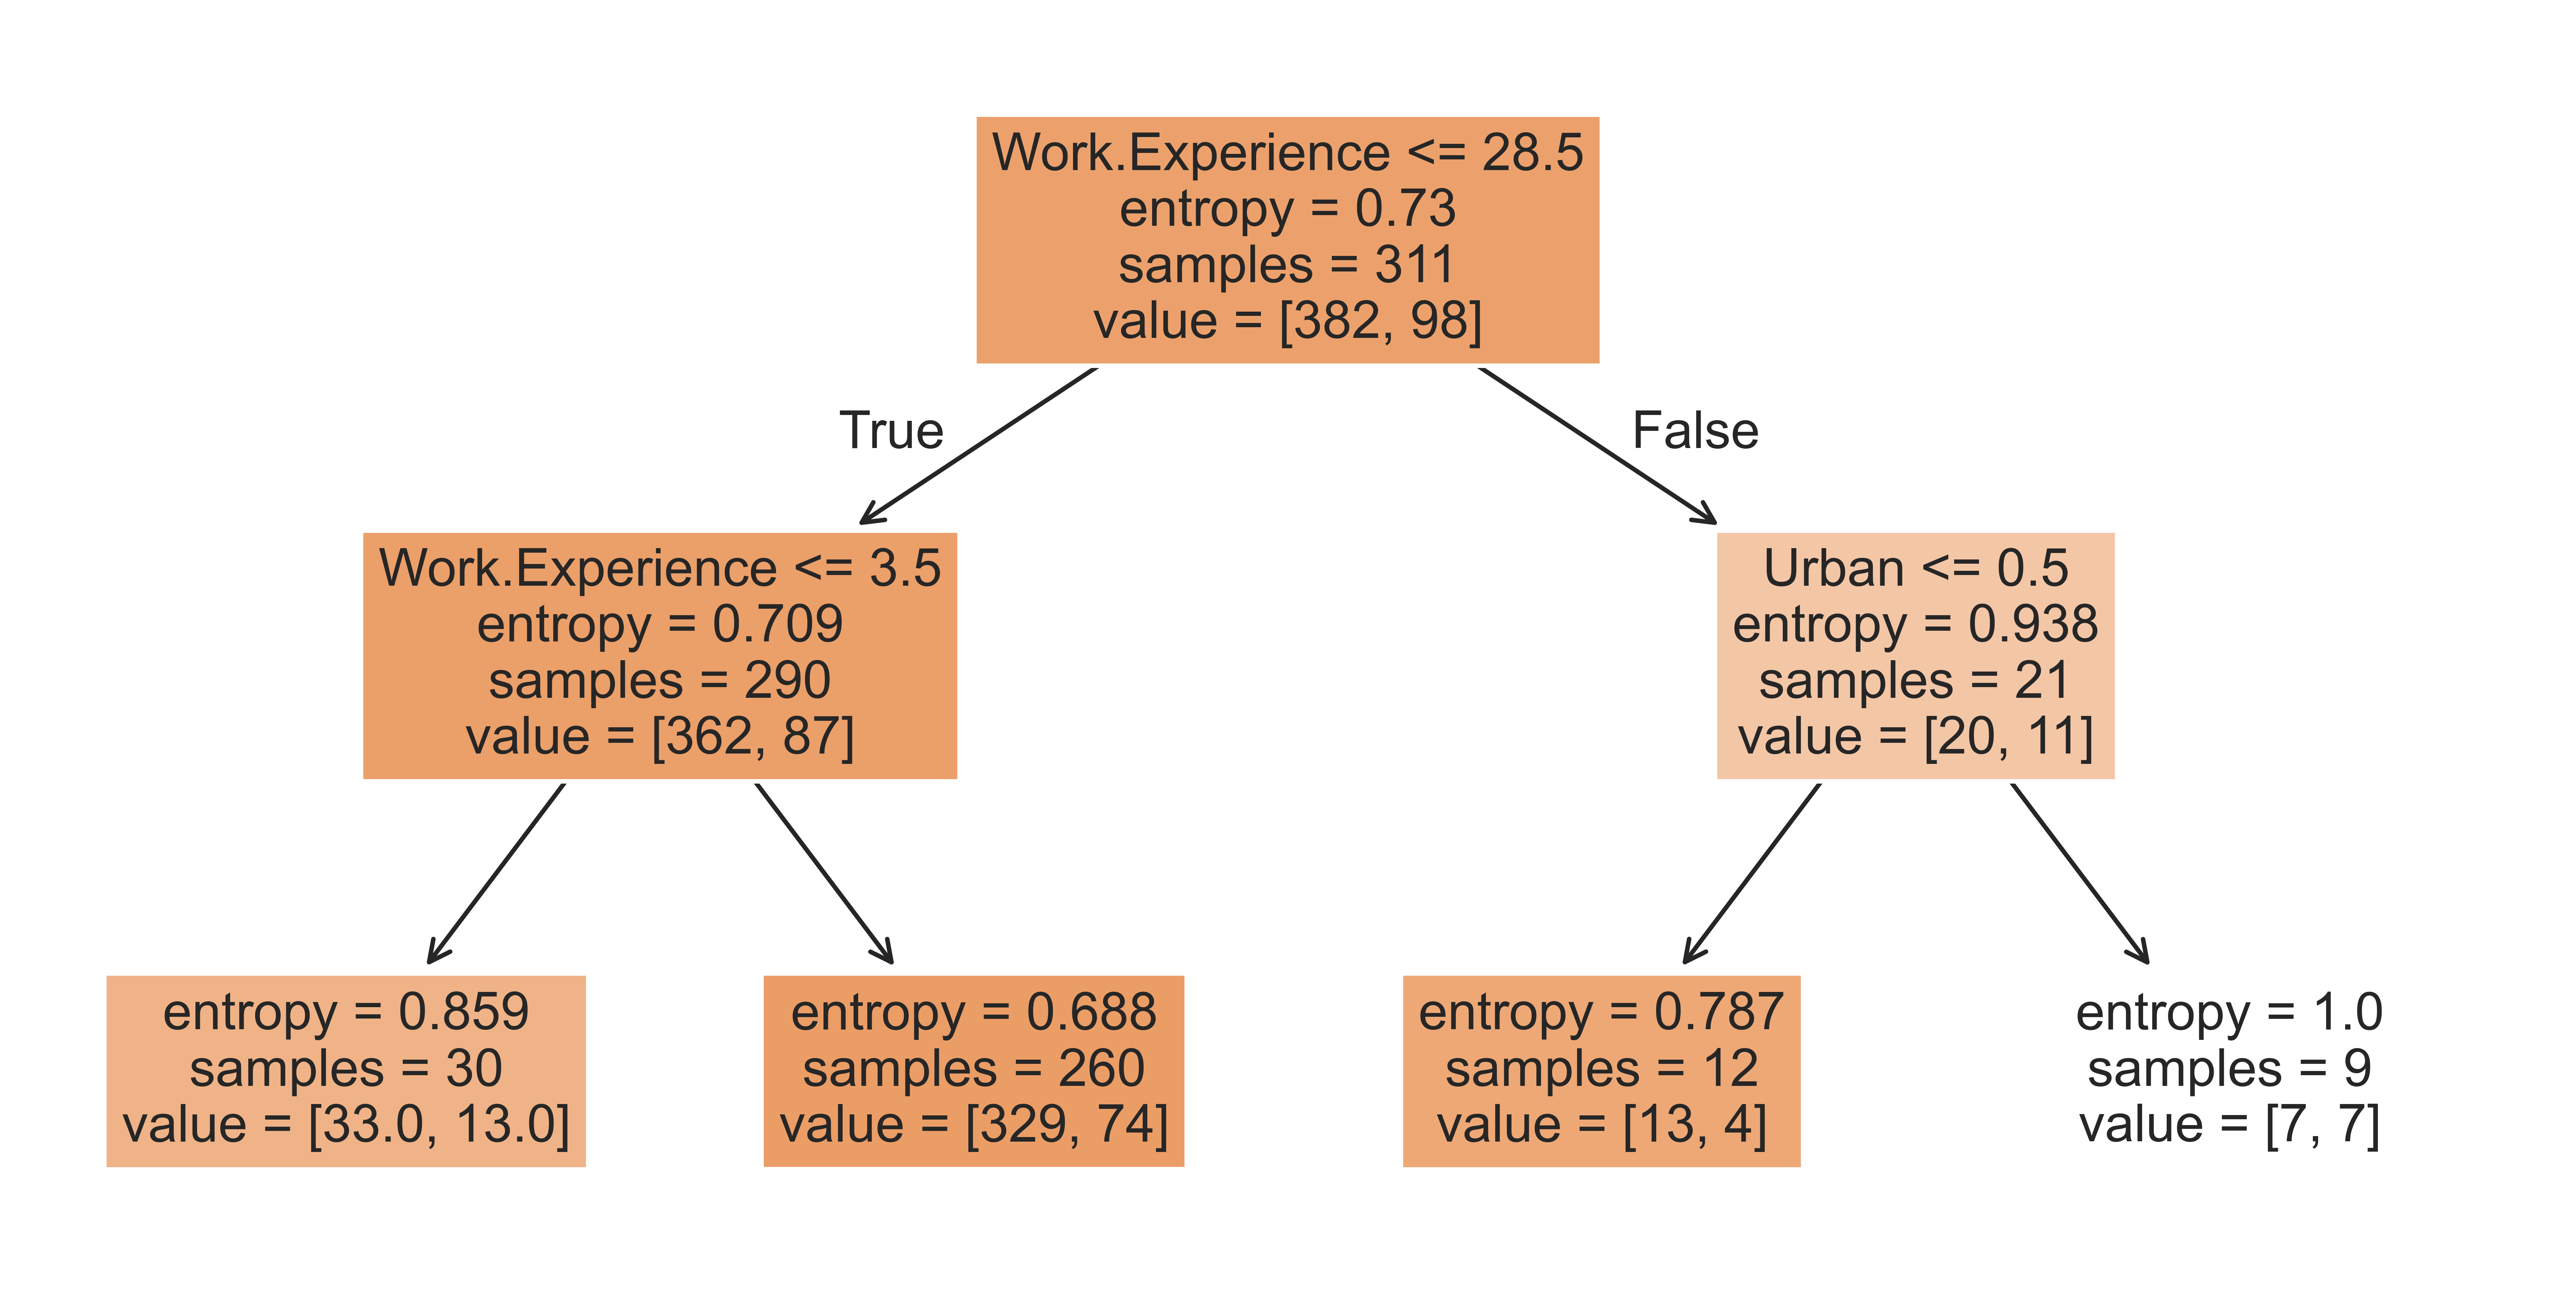

In [36]:
tree.plot_tree(rfc.estimators_[0], feature_names=list(x.columns), filled=True)